<a href="https://colab.research.google.com/github/KushalShah1/ImageProcessingFinal/blob/main/LicensePlateDetection/50statesLcseDet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install easyocr
!pip install imutils

     |████████████████████████████████| 63.6 MB 53 kB/s 
     |████████████████████████████████| 47.6 MB 1.5 MB/s 


In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr
import pandas as pd
import seaborn as sns
import os
import glob

In [ ]:
img_dir = '/content/drive/MyDrive/Fifty States License Plates'
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)

In [ ]:
# Regular images
images = []
gray_images = []
for fi in files:
  im = cv2.imread(fi)
  im1 = cv2.imread(fi, 0)
  images.append(np.array(im))
  gray_images.append(np.array(im1))

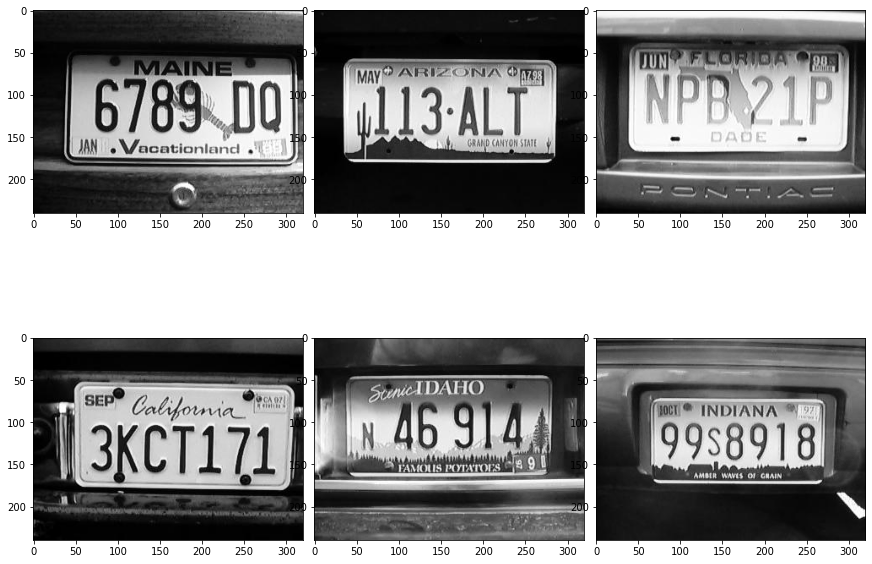

In [ ]:
# Print first few images
fig = plt.figure(figsize=(12, 9), constrained_layout=True)
for i in range(0, 6):
  ax = fig.add_subplot(2, 3, i+1)
  ax.imshow(gray_images[i], cmap=plt.cm.gray)
  
plt.show()

In [ ]:
#Apply filter
img_filtered = []
for img in gray_images:
  bfilter = cv2.bilateralFilter(img, 11, 17, 17)
  edged = cv2.Canny(bfilter, 30, 200)
  img_filtered.append(edged)

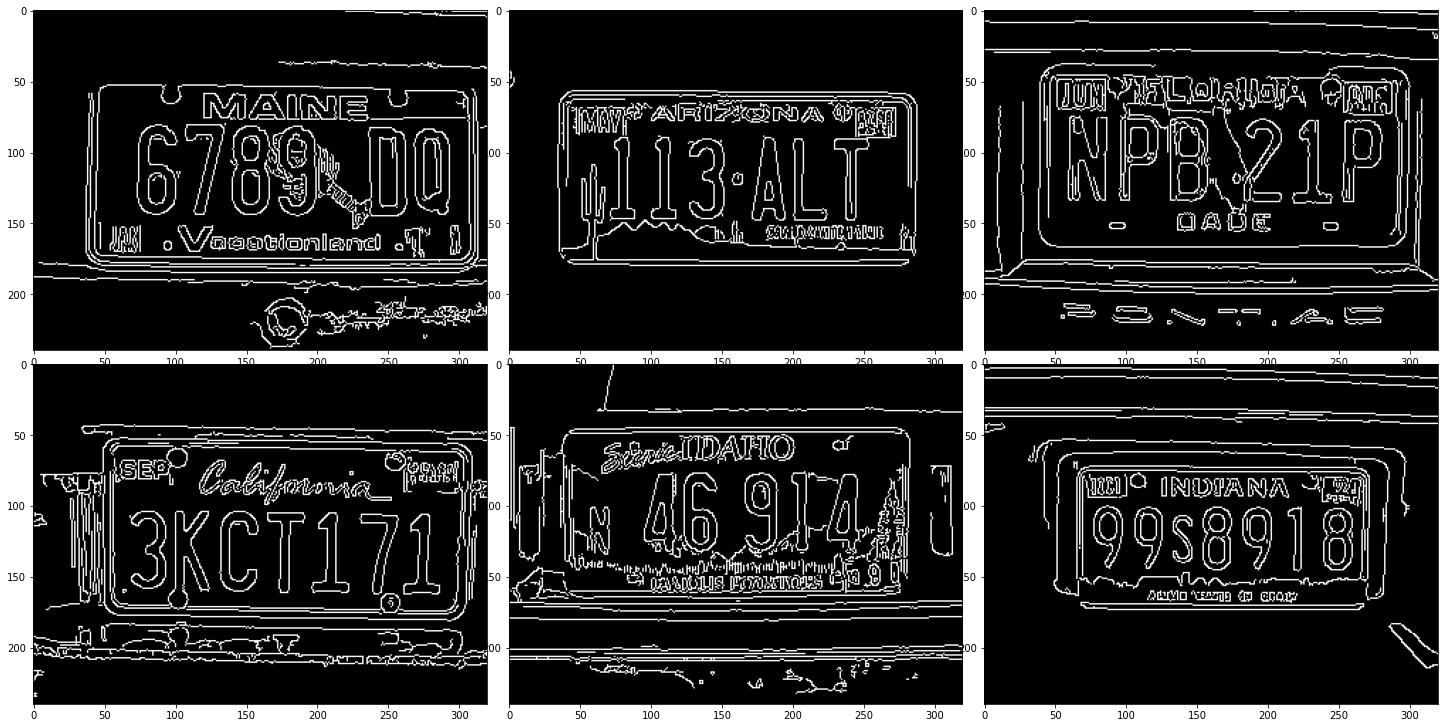

In [ ]:
fig = plt.figure(figsize=(20, 10), constrained_layout=True)
for i in range(0, 6):
  ax = fig.add_subplot(2, 3, i+1)
  ax.imshow(img_filtered[i], cmap=plt.cm.gray)
  
plt.show()

In [ ]:
# find keypoints and contours
new_images = []
  #index = 0;
keypoints = cv2.findContours(gray_images[43].copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
location = None
for contour in contours:
  approx = cv2.approxPolyDP(contour, 10, True)
  if len(approx) == 4:
    location = approx
    break
  
mask = np.zeros(gray_images[43].shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(images[43], images[43], mask=mask)




In [ ]:
keypoints = cv2.findContours(img_filtered[0].copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
location = None

for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
      location = approx
      break
  
mask = np.zeros(gray_images[0].shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(images[0], images[0], mask=mask)

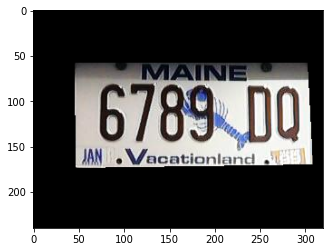

In [ ]:
plt.imshow(new_image, cmap=plt.cm.gray)
plt.show()

In [ ]:
(x, y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray_images[0][x1:x2+1, y1:y2+1]

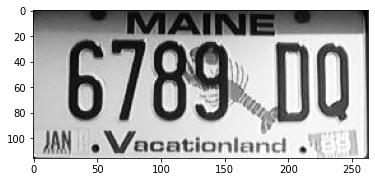

In [ ]:
plt.imshow(cropped_image, cmap=plt.cm.gray)
plt.show()

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[70, 0], [194, 0], [194, 26], [70, 26]], 'MAINE', 0.9994115748526529),
 ([[17, 13], [261, 13], [261, 99], [17, 99]], '6789 DQ', 0.4760124888226387),
 ([[2, 90], [34, 90], [34, 116], [2, 116]], 'HAN', 0.3620901832166976),
 ([[53, 89], [202, 89], [202, 116], [53, 116]],
  'Vacationland',
  0.8462383760923917)]

In [ ]:
result[1][1]

'6789 DQ'

In [ ]:
result_raw = reader.readtext(gray_images[45])
result_raw

[([[49, 61], [159, 61], [159, 81], [49, 81]],
  'WI: cONSIN',
  0.22879275257343307),
 ([[50, 80], [256, 80], [256, 152], [50, 152]], 'RXH-400', 0.9367974027743844),
 ([[46, 140], [84, 140], [84, 166], [46, 166]], 'DEC', 0.9582519380691823),
 ([[97, 157], [155, 157], [155, 169], [97, 169]],
  'Atnoricos',
  0.14882060653759),
 ([[159, 155], [217, 155], [217, 169], [159, 169]],
  'Diwe vlimd',
  0.10300253430005418),
 ([[232, 142], [266, 142], [266, 166], [232, 166]], '978', 0.7496348653192155)]